# Assignment 8: Unsupervised Learning

## Kevin Sun

## December 1, 2017

## MACS30000

### Importing Libraries and Data

In [261]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import sklearn.metrics as sm
import scipy.cluster.hierarchy as hr

%matplotlib inline

In [262]:
df_college = pd.read_csv('College.csv')
df_college.Private.replace(('Yes', 'No'), (1, 0), inplace=True)

In [263]:
df_college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660.0,1232.0,721.0,23.0,52.0,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,1,2186.0,1924.0,512.0,16.0,29.0,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0
2,1,1428.0,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,1,417.0,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0
4,1,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0


In [264]:
# Viewing pairwise correlations of columns 
df_college.corr()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Private,1.000000,-0.432095,-0.475252,-0.567908,0.164132,0.095752,-0.615561,-0.452088,0.552650,0.340532,-0.018549,-0.304485,-0.156714,-0.129620,-0.472205,0.414775,0.258461,0.336162
Apps,-0.432095,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,-0.475252,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,-0.567908,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.164132,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.095752,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,-0.615561,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,-0.452088,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.552650,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.340532,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942


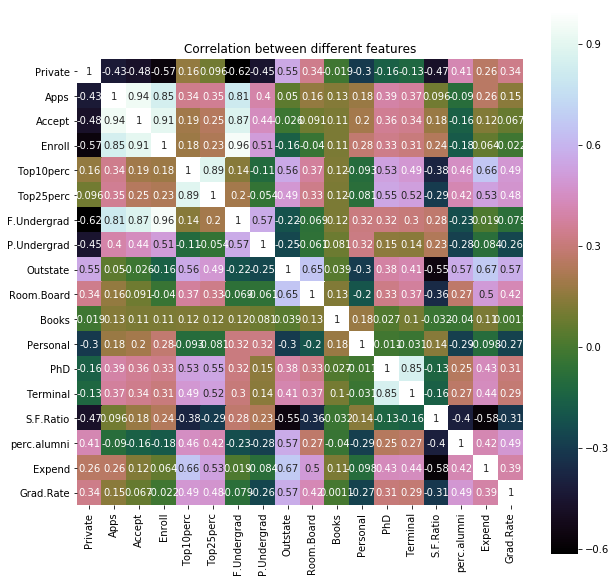

In [265]:
# Visualizing pairwise correlations before performing PCA
correlation = df_college.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different features');

In [266]:
# Standardizing data to mean = 0 and unit variance (variance =1)
X_std = StandardScaler().fit_transform(df_college.values)

In [267]:
# Do PCA
pca = PCA().fit(X_std)

In [268]:
cols = ["PC"+str(x) for x in range (1,19)]
X_pc = pd.DataFrame(pca.components_.T, index=df_college.columns, columns=cols)
X_pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Private,0.089010,-0.345879,0.151387,0.231135,0.044286,-0.031448,0.178345,0.032314,0.084985,0.259596,-0.679758,0.245690,0.400649,-0.010057,0.023202,-0.005373,0.044796,0.007795
Apps,0.199630,0.343621,0.004821,0.305009,-0.022968,-0.008618,-0.061047,-0.099177,-0.084087,0.058147,0.010378,0.041806,0.037404,0.595364,0.080683,0.133747,0.458603,0.363283
Accept,0.153797,0.372557,-0.025351,0.317486,0.031438,0.013074,-0.015474,-0.054225,-0.165274,0.089482,-0.142627,0.004545,-0.073616,0.293398,0.033349,-0.146347,-0.512188,-0.547462
Enroll,0.117797,0.399697,-0.027576,0.204836,-0.065667,-0.043065,-0.008237,0.063261,-0.116813,0.074073,-0.105826,-0.034260,0.059072,-0.446273,-0.081525,0.028481,-0.403907,0.607174
Top10perc,0.360349,-0.016238,0.004681,-0.107519,-0.388227,-0.059923,-0.144406,-0.097143,0.355676,0.059358,0.022126,-0.015181,0.044352,0.000092,-0.106170,0.697422,-0.148018,-0.146308
Top25perc,0.344751,0.017730,-0.058948,-0.146260,-0.409809,0.020615,-0.079889,-0.078063,0.422445,0.043560,-0.138169,-0.231232,-0.099783,0.023782,0.148674,-0.616897,0.050194,0.080606
F.Undergrad,0.094088,0.410732,-0.016806,0.143032,-0.046589,-0.045743,0.000282,0.083930,-0.049761,0.050439,-0.078360,-0.062500,0.069732,-0.525078,-0.053386,0.009842,0.569725,-0.408938
P.Undergrad,-0.017483,0.293064,0.149371,-0.097767,0.327967,-0.196779,0.162965,0.569890,0.543201,-0.229478,-0.045070,0.121136,-0.022846,0.126137,0.019558,0.020679,-0.050648,0.008963
Outstate,0.327664,-0.191518,0.066363,0.128799,0.203252,-0.020296,0.094948,-0.004122,-0.011433,0.197326,-0.064253,0.255436,-0.803653,-0.128007,-0.057204,0.041948,0.078622,0.048023
Room.Board,0.266534,-0.093979,0.182114,0.182427,0.526257,0.183029,0.145142,-0.248673,0.244240,0.189863,0.280765,-0.485832,0.201397,-0.072308,-0.055970,0.003513,-0.028890,0.000368


## PART 1: Colleges

### 1) Perform PCA Analysis on the college dataset and plot the first two principal components. Describe the results.

### What variables appear strongly correlated on the first principal component?
Based on the tables and graph produced below, the top five most strongly correlated variables with the first principal component are, in order: Top10Perc (percent of new students from top 10% of class), Top25Perc (percent of new students from top 25% of class), Expend (instructional expenditure per student), Outstate (out-of-state tuition), and Terminal (precent of faculty with terminal degrees). 

### What about the second principal component?
In regards to the second principal component, the top five most strongly correlated variables are, in order: F.Undergrad (number of fulltime undergraduates), Enroll (number of new students enrolled), Accept (number of applications accepted), Apps (number of applications received), P.Undergrad (number of part-time undergraduates).

In [269]:
X_pc.sort_values(by=['PC1'], ascending=False)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Top10perc,0.360349,-0.016238,0.004681,-0.107519,-0.388227,-0.059923,-0.144406,-0.097143,0.355676,0.059358,0.022126,-0.015181,0.044352,0.000092,-0.106170,0.697422,-0.148018,-0.146308
Top25perc,0.344751,0.017730,-0.058948,-0.146260,-0.409809,0.020615,-0.079889,-0.078063,0.422445,0.043560,-0.138169,-0.231232,-0.099783,0.023782,0.148674,-0.616897,0.050194,0.080606
Expend,0.333011,-0.070291,0.217318,0.007201,0.057088,-0.284475,-0.280168,-0.037568,-0.056184,0.032954,0.455048,0.548290,0.299298,-0.098612,0.080870,-0.228764,-0.038317,-0.034863
Outstate,0.327664,-0.191518,0.066363,0.128799,0.203252,-0.020296,0.094948,-0.004122,-0.011433,0.197326,-0.064253,0.255436,-0.803653,-0.128007,-0.057204,0.041948,0.078622,0.048023
Terminal,0.303868,0.104192,-0.146720,-0.460404,0.265562,0.138323,0.003847,-0.004632,-0.233154,-0.021222,-0.178427,-0.010674,0.054374,-0.059130,0.674551,0.157864,-0.020277,0.007143
PhD,0.303254,0.116191,-0.208486,-0.464586,0.205949,0.071892,0.031347,-0.070547,-0.162873,-0.056003,-0.170535,0.090813,0.117224,0.124602,-0.686449,-0.112695,0.035842,0.015128
Grad.Rate,0.273086,-0.117830,-0.172615,0.268200,-0.141187,0.221848,0.501653,-0.077732,-0.022611,-0.660045,0.103089,0.155926,0.072928,-0.070046,0.037224,-0.003274,-0.006996,-0.013507
Room.Board,0.266534,-0.093979,0.182114,0.182427,0.526257,0.183029,0.145142,-0.248673,0.244240,0.189863,0.280765,-0.485832,0.201397,-0.072308,-0.055970,0.003513,-0.028890,0.000368
perc.alumni,0.236659,-0.194061,-0.159443,0.010001,-0.215141,-0.051661,0.286361,0.640386,-0.290526,0.346309,0.260018,-0.218230,0.091557,0.103115,-0.026840,-0.008155,0.000483,-0.019705
Apps,0.199630,0.343621,0.004821,0.305009,-0.022968,-0.008618,-0.061047,-0.099177,-0.084087,0.058147,0.010378,0.041806,0.037404,0.595364,0.080683,0.133747,0.458603,0.363283


In [270]:
X_pc.sort_values(by=['PC2'], ascending=False)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
F.Undergrad,0.094088,0.410732,-0.016806,0.143032,-0.046589,-0.045743,0.000282,0.083930,-0.049761,0.050439,-0.078360,-0.062500,0.069732,-0.525078,-0.053386,0.009842,0.569725,-0.408938
Enroll,0.117797,0.399697,-0.027576,0.204836,-0.065667,-0.043065,-0.008237,0.063261,-0.116813,0.074073,-0.105826,-0.034260,0.059072,-0.446273,-0.081525,0.028481,-0.403907,0.607174
Accept,0.153797,0.372557,-0.025351,0.317486,0.031438,0.013074,-0.015474,-0.054225,-0.165274,0.089482,-0.142627,0.004545,-0.073616,0.293398,0.033349,-0.146347,-0.512188,-0.547462
Apps,0.199630,0.343621,0.004821,0.305009,-0.022968,-0.008618,-0.061047,-0.099177,-0.084087,0.058147,0.010378,0.041806,0.037404,0.595364,0.080683,0.133747,0.458603,0.363283
P.Undergrad,-0.017483,0.293064,0.149371,-0.097767,0.327967,-0.196779,0.162965,0.569890,0.543201,-0.229478,-0.045070,0.121136,-0.022846,0.126137,0.019558,0.020679,-0.050648,0.008963
S.F.Ratio,-0.210260,0.204395,-0.292254,-0.074900,-0.051540,0.469366,0.275797,-0.094498,0.284508,0.447714,0.216199,0.424754,0.058408,-0.019182,0.044870,-0.021720,-0.014827,-0.001297
Personal,-0.071900,0.192755,0.469563,-0.290643,-0.187994,-0.347055,0.609167,-0.301427,-0.121605,0.116884,0.046776,-0.020377,-0.037882,0.040094,0.026610,-0.003041,-0.012911,-0.001211
PhD,0.303254,0.116191,-0.208486,-0.464586,0.205949,0.071892,0.031347,-0.070547,-0.162873,-0.056003,-0.170535,0.090813,0.117224,0.124602,-0.686449,-0.112695,0.035842,0.015128
Terminal,0.303868,0.104192,-0.146720,-0.460404,0.265562,0.138323,0.003847,-0.004632,-0.233154,-0.021222,-0.178427,-0.010674,0.054374,-0.059130,0.674551,0.157864,-0.020277,0.007143
Books,0.057189,0.057338,0.662310,-0.089301,-0.158557,0.648309,-0.141371,0.225032,-0.133262,-0.075845,-0.020424,0.037193,-0.024914,0.011827,-0.067683,-0.009266,0.001728,0.000603


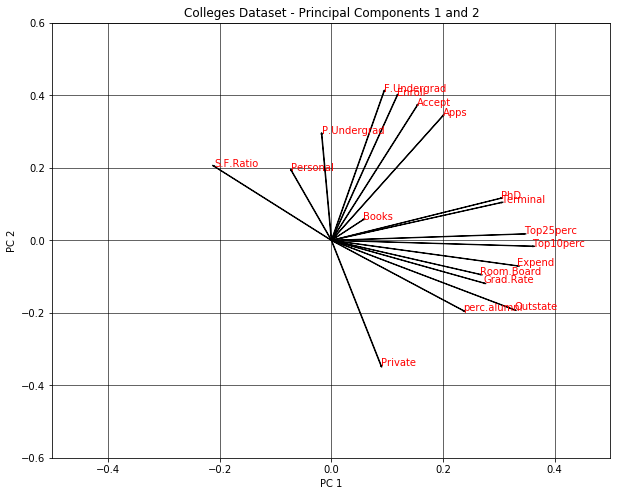

In [271]:
%matplotlib inline
fig , ax = plt.subplots(figsize = (10, 8))
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.6, 0.6)
ax.grid(color = 'black', linewidth = 0.6)

for i in range(len(df_college.columns)):
    ax.arrow(0, 0, X_pc.PC1[i], X_pc.PC2[i], color = "black")
    
for i in X_pc[:].index:
    ax.annotate(i, (X_pc.PC1.loc[i], X_pc.PC2.loc[i]), color='red')
    
ax.set_title('Colleges Dataset - Principal Components 1 and 2')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

### 2) Calculate the cumulative proportion of variacne explained by all the principal components. Approximately how much of the variance in College is explained by the first two principal components?

Based on the graph and the array - which shows the cumulative variance of the variables. Approximately 58.42% of the variation is explained by the first two principal components.

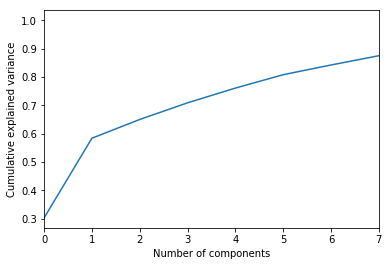

In [272]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [273]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.30332963,  0.58422333,  0.65031134,  0.70898515,  0.76095207,
        0.80807394,  0.84232387,  0.87497235,  0.90452983,  0.92730054,
        0.94717949,  0.96423591,  0.97454463,  0.98385408,  0.99183819,
        0.99672176,  0.99872342,  1.        ])

## PART 2: Clustering States

### Loading Data

In [274]:
df_crime = pd.read_csv('USArrests.csv',index_col = 0)
df_crime.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


### 1) Perform PCA on the dataset and plot the observations on the first and second principal components.

In [275]:
#standardize variables at mean = 0 and variance=1
scaled_X2 = StandardScaler().fit_transform(df_crime.values)
pca2 = PCA(2).fit(scaled_X2).transform(scaled_X2)
X_pc2 = pd.DataFrame(pca2, index = df_crime.index, columns=["PC1", "PC2"])
X_pc2

,PC1,PC2
State,,
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934
Colorado,1.514563,-0.987555
Connecticut,-1.358647,-1.088928
Delaware,0.047709,-0.325359
Florida,3.013042,0.039229


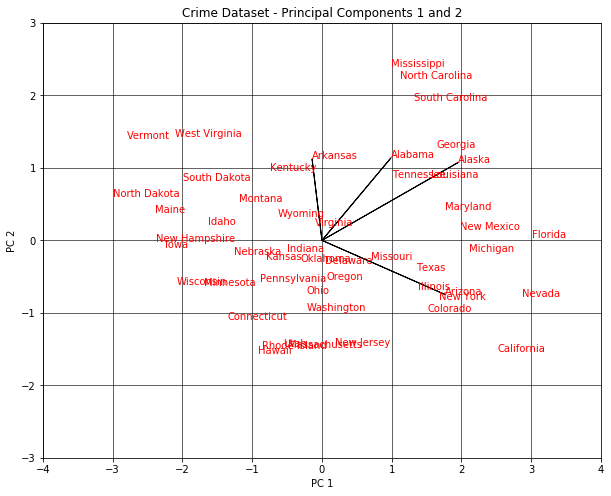

In [276]:
fig , ax = plt.subplots(figsize = (10, 8))
ax.set_xlim(-4, 4)
ax.set_ylim(-3, 3)
ax.grid(color = 'black', linewidth = 0.6)

for i in range(len(df_crime.columns)):
    ax.arrow(0, 0, X_pc2.PC1[i], X_pc2.PC2[i], color = "black")
    
for i in X_pc2[:].index:
    ax.annotate(i, (X_pc2.PC1.loc[i], X_pc2.PC2.loc[i]), color='red')
    
ax.set_title('Crime Dataset - Principal Components 1 and 2')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

### 2-4) Perform K-Means clustering with K=2, K=3, K=4. Plot the observations on the 1st and 2nd principal components and color-code each state based on their cluster membership. Describe your results.

In [277]:
km2 = KMeans(n_clusters=2, n_init=20).fit(df_crime)
km3 = KMeans(n_clusters=3, n_init=20).fit(df_crime)
km4 = KMeans(n_clusters=4, n_init=20).fit(df_crime)

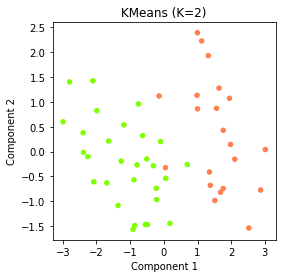

In [278]:
km2.labels_ # code labels as numerics
plt.figure(figsize=(4,4)) 
color_ref = np.array(['coral', 'chartreuse']) #assign colors to numeric code by cluster
#create scatterplot and label axes
plt.scatter(X_pc2.PC1, X_pc2.PC2, c=color_ref[km2.labels_], s=20)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('KMeans (K=2)');

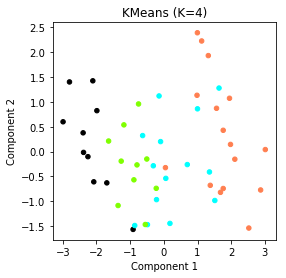

In [279]:
km4.labels_
plt.figure(figsize=(4,4))
color_ref = np.array(['coral', 'chartreuse', 'cyan', 'black']) #assign colors to numeric code by cluster
#create scatterplot and label axes
plt.scatter(X_pc2.PC1, X_pc2.PC2, c=color_ref[km4.labels_], s=20) 
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('KMeans (K=4)');

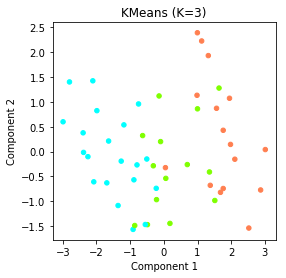

In [280]:
km3.labels_ #code labels as numerics
plt.figure(figsize=(4,4))
color_ref = np.array(['coral', 'chartreuse', 'cyan']) #assign colors to numeric code by cluster
#create scatterplot and label axes
plt.scatter(X_pc2.PC1, X_pc2.PC2, c=color_ref[km3.labels_], s=20)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('KMeans (K=3)');

### 5) Perform K-Means clustering with K=3 on the first two principal components score vectors, rather than the raw data. Describe your results and compare them to the clustering results with K=3 based on the raw data.

When clustering based on the first two principal component score vectors versus the raw data, the clusters appear to be more distinct. However, this does not change each cluster's membership of states. 

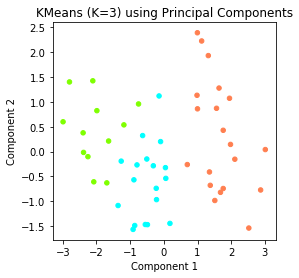

In [281]:
km3_PC = KMeans(n_clusters=3, n_init=20).fit(X_pc2)
km3.labels_
plt.figure(figsize=(4,4))
color_ref = np.array(['cyan', 'chartreuse', 'coral']) #assign colors to numeric code by cluster
#create scatterplot and label axes
plt.scatter(X_pc2.PC1, X_pc2.PC2, c=color_ref[km3_PC.labels_], s=20) 
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('KMeans (K=3) using Principal Components');

## 6) Using hierarchical clustering with complete linkage and Euclidian distance, cluster the states.

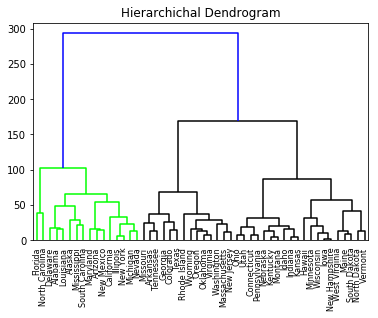

In [284]:
hierarchy = hr.complete(df_crime)
hr.dendrogram(hierarchy, labels = df_crime.index)
plt.title("Hierarchichal Dendrogram");

## 7) Cut the dengrogram at a height that results in three distinct clusters. Which states belong to which clusters?

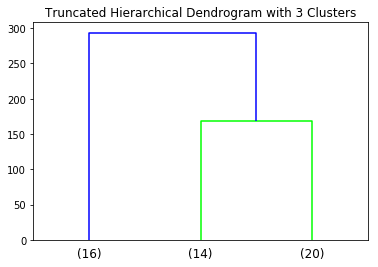

In [285]:
hr.dendrogram(hierarchy, truncate_mode='lastp', p=3, labels = df_crime.index)
plt.title("Truncated Hierarchical Dendrogram with 3 Clusters")

State Groups are as follows:

Group 1: Alabama, Alaska, Arizona, California, Delaware, Florida, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina.

Group 2: Arkansas, Colorado, Georgia, Massachusetts, Missouri, New Jersey, Oklahoma, Oregon, Rhode Island, Tennessee, Texas, Virginia, Washington, Wyoming.

Group 3: Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, Ohio, Pennsylvania, South Dakota, Utah, Vermont, West Virginia, Wisconsin.

## 8) Heirarchically cluster the states using complete linkage and Eculidean distance, after scaling the varaibles to have standard deviation 1. What effect does scaling the variabels have on the hierarchical clustering obtained?

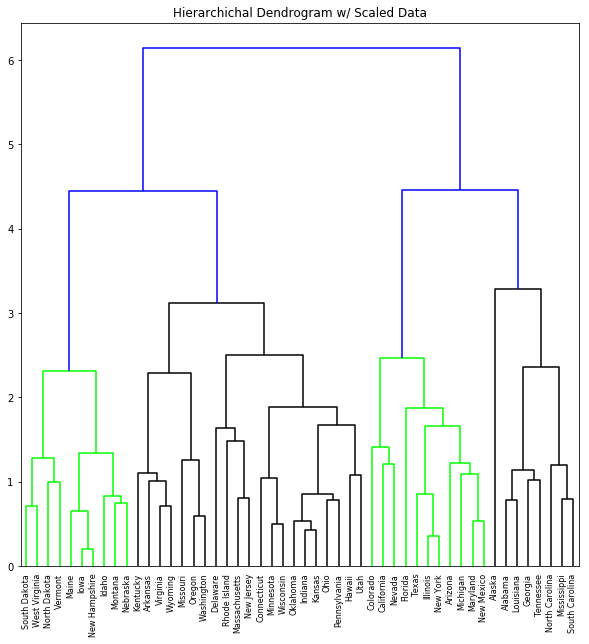

In [290]:
hierarchy = hr.complete(scaled_X2)
plt.figure(figsize = (10,10))
hr.dendrogram(hierarchy, labels = df_crime.index)
plt.title("Hierarchichal Dendrogram w/ Scaled Data");

When scaling the variables, there appears to be a quicker breakdown into distinct groups. When scaling variables, we are providing variables with the same weight; this might allow us to make more direct comparisons between instances of type of crime.